<a href="https://colab.research.google.com/github/Eskarteek/Eskarteek_DATA606/blob/main/Final_Capstoneipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
pip install newspaper3k

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from GoogleNews import GoogleNews
from newspaper import Article
from newspaper import Config
import pandas as pd
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from datetime import datetime
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from pandas_datareader._utils import RemoteDataError
import pandas as pd
from datetime import datetime, timedelta
import pandas_datareader.data as web
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from datetime import datetime
import plotly.express as px
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from pandas_datareader._utils import RemoteDataError
import pandas as pd
from datetime import datetime, timedelta
import pandas_datareader.data as web
from datetime import datetime as dt
from datetime import datetime, timedelta

In [65]:
now = dt.today()
now = now.strftime('%m-%d-%Y')
yesterday = dt.today() - timedelta(days = 1)
yesterday = yesterday.strftime('%m-%d-%Y')

#nltk.download('punkt')
user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:78.0) Gecko/20100101 Firefox/78.0'
config = Config()
config.browser_user_agent = user_agent
config.request_timeout = 50

In [66]:
# save the company name in a variable
company_name = 'BBY'
#As long as the company name is valid, not empty...
if company_name != '':
    print(f'Searching for and analyzing {company_name}, Please be patient, it might take a while...')

    #Extract News with Google News
    googlenews = GoogleNews(start=yesterday,end=now)
    googlenews.search(company_name)
    result = googlenews.result()
    #store the results
    df = pd.DataFrame(result)

Searching for and analyzing BBY, Please be patient, it might take a while...


In [67]:
df

,title,media,date,datetime,desc,link,img
0,$1.57 Earnings Per Share Expected for Best Buy...,Defense World,8 hours ago,2022-04-23 22:43:35.809465,(NYSE:BBY – Get Rating) will report earnings p...,https://www.defenseworld.net/2022/04/23/1-57-e...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
1,"Best Buy recalls 772,000 Insignia air fryers, ...",Business Insider,3 hours ago,2022-04-24 03:43:35.813401,"Best Buy is recalling 772,000 Insignia air fry...",https://www.businessinsider.com/best-buy-recal...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
2,Best Buy recalls Insignia air fryers due to fi...,CBS 17,9 hours ago,2022-04-23 21:43:35.817073,(NEXSTAR) — Best Buy is voluntarily recalling ...,https://www.cbs17.com/news/best-buy-recalls-in...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
3,Nearly 1 Million Air Fryers Have Been Recalled...,SheKnows,2 hours ago,2022-04-24 04:43:35.820692,"On April 21, Best Buy sent out a notice posted...",https://www.sheknows.com/food-and-recipes/arti...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
4,Nearly 1 Million Air Fryers Have Been Recalled...,Yahoo,5 hours ago,2022-04-24 01:43:35.824152,"On April 21, Best Buy sent out a notice posted...",https://www.yahoo.com/lifestyle/nearly-1-milli...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
5,Matthew Hall replaced expensive Best Buy order...,Scoop: Nashville,2 hours ago,2022-04-24 04:43:35.829955,24-year-old Matthew Hall was jailed this week ...,https://www.scoopnashville.com/2022/04/matthew...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
6,Plans For Best Buy Closings in 2022 | Joel Eis...,NewsBreak Original,2 hours ago,2022-04-24 04:43:35.835304,2021 saw the venerable chain laying off over 5...,https://original.newsbreak.com/@joel-eisenberg...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
7,Best Buy recalls air fryers over fire hazard,WOAI,4 hours ago,2022-04-24 02:43:35.869580,Best buy is recalling Insignia air fryers and ...,https://news4sanantonio.com/news/nation-world/...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
8,15 Mother's Day gifts you can snag at Best Buy,Yahoo News Singapore,7 hours ago,2022-04-23 23:43:35.899026,15 Mother's Day 2022 gifts we're eyeing from B...,https://sg.news.yahoo.com/best-buy-mothers-day...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
9,Save on several Meta Quest 2 VR games this wee...,The Verge,7 hours ago,2022-04-23 23:43:35.903043,"Also at Best Buy, you can trade in your old mo...",https://www.theverge.com/good-deals/2022/4/23/...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."


In [169]:
df[['title','date','link']]

,title,date,link
0,$1.57 Earnings Per Share Expected for Best Buy...,8 hours ago,https://www.defenseworld.net/2022/04/23/1-57-e...
1,"Best Buy recalls 772,000 Insignia air fryers, ...",3 hours ago,https://www.businessinsider.com/best-buy-recal...
2,Best Buy recalls Insignia air fryers due to fi...,9 hours ago,https://www.cbs17.com/news/best-buy-recalls-in...
3,Nearly 1 Million Air Fryers Have Been Recalled...,2 hours ago,https://www.sheknows.com/food-and-recipes/arti...
4,Nearly 1 Million Air Fryers Have Been Recalled...,5 hours ago,https://www.yahoo.com/lifestyle/nearly-1-milli...
5,Matthew Hall replaced expensive Best Buy order...,2 hours ago,https://www.scoopnashville.com/2022/04/matthew...
6,Plans For Best Buy Closings in 2022 | Joel Eis...,2 hours ago,https://original.newsbreak.com/@joel-eisenberg...
7,Best Buy recalls air fryers over fire hazard,4 hours ago,https://news4sanantonio.com/news/nation-world/...
8,15 Mother's Day gifts you can snag at Best Buy,7 hours ago,https://sg.news.yahoo.com/best-buy-mothers-day...
9,Save on several Meta Quest 2 VR games this wee...,7 hours ago,https://www.theverge.com/good-deals/2022/4/23/...


In [68]:
try:
    list =[] #creating an empty list 
    for i in df.index:
        dict = {} #creating an empty dictionary to append an article in every single iteration
        article = Article(df['link'][i],config=config) #providing the link
        try:
          article.download() #downloading the article 
          article.parse() #parsing the article
          article.nlp() #performing natural language processing (nlp)
        except:
           pass 
        #storing results in our empty dictionary
        dict['Date']=df['date'][i] 
        dict['Media']=df['media'][i]
        dict['Title']=article.title
        dict['Article']=article.text
        dict['Summary']=article.summary
        dict['Key_words']=article.keywords
        list.append(dict)
    check_empty = not any(list)
    # print(check_empty)
    if check_empty == False:
      news_df=pd.DataFrame(list) #creating dataframe
      news_df

except Exception as e:
    #exception handling
    print("exception occurred:" + str(e))
    print('Looks like, there is some error in retrieving the data, Please try again or try with a different ticker.' )

In [69]:
news_df

,Date,Media,Title,Article,Summary,Key_words
0,8 hours ago,Defense World,$1.57 Earnings Per Share Expected for Best Buy...,Wall Street brokerages expect that Best Buy Co...,Wall Street brokerages expect that Best Buy Co...,"[share, research, zacks, shares, expected, qua..."
1,3 hours ago,Business Insider,"Best Buy is recalling more than 700,000 air fr...","Best Buy is recalling 772,000 Insignia air fry...","Best Buy is recalling 772,000 Insignia air fry...","[reports, catching, recalling, return, refund,..."
2,9 hours ago,CBS 17,Best Buy recalls Insignia air fryers due to fi...,(NEXSTAR) — Best Buy is voluntarily recalling ...,(NEXSTAR) — Best Buy is voluntarily recalling ...,"[recalls, reports, hazard, models, company, bu..."
3,2 hours ago,SheKnows,Nearly 1 Million Air Fryers Have Been Recalled...,"Best Buy is recalling over 772,000 air fryers ...","Best Buy is recalling over 772,000 air fryers ...","[air, levels, nearly, overheating, recalled, f..."
4,5 hours ago,Yahoo,Nearly 1 Million Air Fryers Have Been Recalled...,"Best Buy is recalling over 772,000 air fryers ...","Best Buy is recalling over 772,000 air fryers ...","[air, levels, nearly, overheating, recalled, f..."
5,2 hours ago,Scoop: Nashville,Matthew Hall replaced expensive Best Buy order...,Share this article...\n\n24-year-old Matthew H...,Share this article...24-year-old Matthew Hall ...,"[delivery, matthew, replaced, item, phone, rec..."
6,2 hours ago,NewsBreak Original,Plans For Best Buy Closings in 2022,2021 saw the venerable chain laying off over 5...,Best Buy Adobe StockAuthor’s NoteThis article ...,"[2021, close, plans, store, buy, online, artic..."
7,4 hours ago,WOAI,Best Buy recalls air fryers over fire hazard,,,"[recalls, hazard, buy, fryers, best, air]"
8,7 hours ago,Yahoo News Singapore,15 Mother's Day gifts you can snag at Best Buy,15 Mother's Day 2022 gifts we're eyeing from B...,15 Mother's Day 2022 gifts we're eyeing from B...,"[fitness, day, mothers, watch, snag, gifts, fe..."
9,7 hours ago,The Verge,Save on several Meta Quest 2 VR games this wee...,Only the best deals on Verge-approved gadgets ...,Meta held its 2022 games showcase this past we...,"[doorbell, meta, weekend, nest, batterypowered..."


In [70]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [71]:
word_list =[]
for text in news_df['Article']:
    sentences = sent_tokenize(str(text))
    tokens = word_tokenize(text)
    words = [word for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    str1 = ''
    for i in words:
        str1 = str1+i+" "
    word_list.append(str1)
news_df['words'] = word_list
news_df

,Date,Media,Title,Article,Summary,Key_words,words
0,8 hours ago,Defense World,$1.57 Earnings Per Share Expected for Best Buy...,Wall Street brokerages expect that Best Buy Co...,Wall Street brokerages expect that Best Buy Co...,"[share, research, zacks, shares, expected, qua...",Wall Street brokerages expect Best Buy NYSE BB...
1,3 hours ago,Business Insider,"Best Buy is recalling more than 700,000 air fr...","Best Buy is recalling 772,000 Insignia air fry...","Best Buy is recalling 772,000 Insignia air fry...","[reports, catching, recalling, return, refund,...",Best Buy recalling Insignia air fryers air fry...
2,9 hours ago,CBS 17,Best Buy recalls Insignia air fryers due to fi...,(NEXSTAR) — Best Buy is voluntarily recalling ...,(NEXSTAR) — Best Buy is voluntarily recalling ...,"[recalls, reports, hazard, models, company, bu...",NEXSTAR Best Buy voluntarily recalling several...
3,2 hours ago,SheKnows,Nearly 1 Million Air Fryers Have Been Recalled...,"Best Buy is recalling over 772,000 air fryers ...","Best Buy is recalling over 772,000 air fryers ...","[air, levels, nearly, overheating, recalled, f...",Best Buy recalling air fryers air fryer ovens ...
4,5 hours ago,Yahoo,Nearly 1 Million Air Fryers Have Been Recalled...,"Best Buy is recalling over 772,000 air fryers ...","Best Buy is recalling over 772,000 air fryers ...","[air, levels, nearly, overheating, recalled, f...",Best Buy recalling air fryers air fryer ovens ...
5,2 hours ago,Scoop: Nashville,Matthew Hall replaced expensive Best Buy order...,Share this article...\n\n24-year-old Matthew H...,Share this article...24-year-old Matthew Hall ...,"[delivery, matthew, replaced, item, phone, rec...",Share article Matthew Hall jailed week two out...
6,2 hours ago,NewsBreak Original,Plans For Best Buy Closings in 2022,2021 saw the venerable chain laying off over 5...,Best Buy Adobe StockAuthor’s NoteThis article ...,"[2021, close, plans, store, buy, online, artic...",saw venerable chain laying employees permanent...
7,4 hours ago,WOAI,Best Buy recalls air fryers over fire hazard,,,"[recalls, hazard, buy, fryers, best, air]",
8,7 hours ago,Yahoo News Singapore,15 Mother's Day gifts you can snag at Best Buy,15 Mother's Day 2022 gifts we're eyeing from B...,15 Mother's Day 2022 gifts we're eyeing from B...,"[fitness, day, mothers, watch, snag, gifts, fe...",Mother Day gifts eyeing Best Buy Canada Yahoo ...
9,7 hours ago,The Verge,Save on several Meta Quest 2 VR games this wee...,Only the best deals on Verge-approved gadgets ...,Meta held its 2022 games showcase this past we...,"[doorbell, meta, weekend, nest, batterypowered...",Only best deals gadgets get Verge Deals stamp ...


In [72]:
vader = SentimentIntensityAnalyzer()
scores = news_df['words'].apply(vader.polarity_scores).tolist()
news_df['Score'] = scores

In [73]:
neg = []
pos = []
neu = []
comp = []
for i in news_df['Score']:
    neg.append(i['neg'])
    pos.append(i['pos'])
    neu.append(i['neu'])
    comp.append(i['compound'])

In [74]:
news_df['Positive Score'] = pos
news_df['Negative Score'] = neg
news_df['Neutral Score'] = neu
news_df['Compound'] = comp

In [75]:
pn = []
for i in news_df['Compound']:
    if i > 0:
        pn.append(1)
    elif i == 0:
        pn.append(0)
    else:
        pn.append(-1)

In [76]:
news_df['PNN Score'] = pn 

In [77]:
news_df

,Date,Media,Title,Article,Summary,Key_words,words,Score,Positive Score,Negative Score,Neutral Score,Compound,PNN Score
0,8 hours ago,Defense World,$1.57 Earnings Per Share Expected for Best Buy...,Wall Street brokerages expect that Best Buy Co...,Wall Street brokerages expect that Best Buy Co...,"[share, research, zacks, shares, expected, qua...",Wall Street brokerages expect Best Buy NYSE BB...,"{'neg': 0.018, 'neu': 0.717, 'pos': 0.264, 'co...",0.264,0.018,0.717,0.9996,1
1,3 hours ago,Business Insider,"Best Buy is recalling more than 700,000 air fr...","Best Buy is recalling 772,000 Insignia air fry...","Best Buy is recalling 772,000 Insignia air fry...","[reports, catching, recalling, return, refund,...",Best Buy recalling Insignia air fryers air fry...,"{'neg': 0.065, 'neu': 0.695, 'pos': 0.24, 'com...",0.240,0.065,0.695,0.9908,1
2,9 hours ago,CBS 17,Best Buy recalls Insignia air fryers due to fi...,(NEXSTAR) — Best Buy is voluntarily recalling ...,(NEXSTAR) — Best Buy is voluntarily recalling ...,"[recalls, reports, hazard, models, company, bu...",NEXSTAR Best Buy voluntarily recalling several...,"{'neg': 0.087, 'neu': 0.659, 'pos': 0.254, 'co...",0.254,0.087,0.659,0.9924,1
3,2 hours ago,SheKnows,Nearly 1 Million Air Fryers Have Been Recalled...,"Best Buy is recalling over 772,000 air fryers ...","Best Buy is recalling over 772,000 air fryers ...","[air, levels, nearly, overheating, recalled, f...",Best Buy recalling air fryers air fryer ovens ...,"{'neg': 0.083, 'neu': 0.684, 'pos': 0.233, 'co...",0.233,0.083,0.684,0.9828,1
4,5 hours ago,Yahoo,Nearly 1 Million Air Fryers Have Been Recalled...,"Best Buy is recalling over 772,000 air fryers ...","Best Buy is recalling over 772,000 air fryers ...","[air, levels, nearly, overheating, recalled, f...",Best Buy recalling air fryers air fryer ovens ...,"{'neg': 0.072, 'neu': 0.709, 'pos': 0.219, 'co...",0.219,0.072,0.709,0.9870,1
5,2 hours ago,Scoop: Nashville,Matthew Hall replaced expensive Best Buy order...,Share this article...\n\n24-year-old Matthew H...,Share this article...24-year-old Matthew Hall ...,"[delivery, matthew, replaced, item, phone, rec...",Share article Matthew Hall jailed week two out...,"{'neg': 0.058, 'neu': 0.707, 'pos': 0.235, 'co...",0.235,0.058,0.707,0.9702,1
6,2 hours ago,NewsBreak Original,Plans For Best Buy Closings in 2022,2021 saw the venerable chain laying off over 5...,Best Buy Adobe StockAuthor’s NoteThis article ...,"[2021, close, plans, store, buy, online, artic...",saw venerable chain laying employees permanent...,"{'neg': 0.019, 'neu': 0.79, 'pos': 0.191, 'com...",0.191,0.019,0.790,0.9980,1
7,4 hours ago,WOAI,Best Buy recalls air fryers over fire hazard,,,"[recalls, hazard, buy, fryers, best, air]",,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.000,0.000,0.000,0.0000,0
8,7 hours ago,Yahoo News Singapore,15 Mother's Day gifts you can snag at Best Buy,15 Mother's Day 2022 gifts we're eyeing from B...,15 Mother's Day 2022 gifts we're eyeing from B...,"[fitness, day, mothers, watch, snag, gifts, fe...",Mother Day gifts eyeing Best Buy Canada Yahoo ...,"{'neg': 0.018, 'neu': 0.63, 'pos': 0.351, 'com...",0.351,0.018,0.630,0.9998,1
9,7 hours ago,The Verge,Save on several Meta Quest 2 VR games this wee...,Only the best deals on Verge-approved gadgets ...,Meta held its 2022 games showcase this past we...,"[doorbell, meta, weekend, nest, batterypowered...",Only best deals gadgets get Verge Deals stamp ...,"{'neg': 0.037, 'neu': 0.699, 'pos': 0.264, 'co...",0.264,0.037,0.699,0.9984,1


In [78]:
pie_list = [news_df['Positive Score'].mean(), news_df['Negative Score'].mean(), news_df['Neutral Score'].mean()]
Name_list = ['Positive','Negative','Neutral']
fig = px.pie(news_df, values=pie_list, names=Name_list, title='Stock Name '+'Financial News Sentiment for')
fig.show()

In [79]:
from wordcloud import WordCloud, STOPWORDS

In [80]:
text = ''
for i in range(len(news_df)):
  text+=news_df['Article'][i]

In [82]:
# Clean text
import re
text = re.sub(r'==.*?==+', '', text)
text = text.replace('\n', '')

In [84]:
# Import package
import matplotlib.pyplot as plt
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(20, 20))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

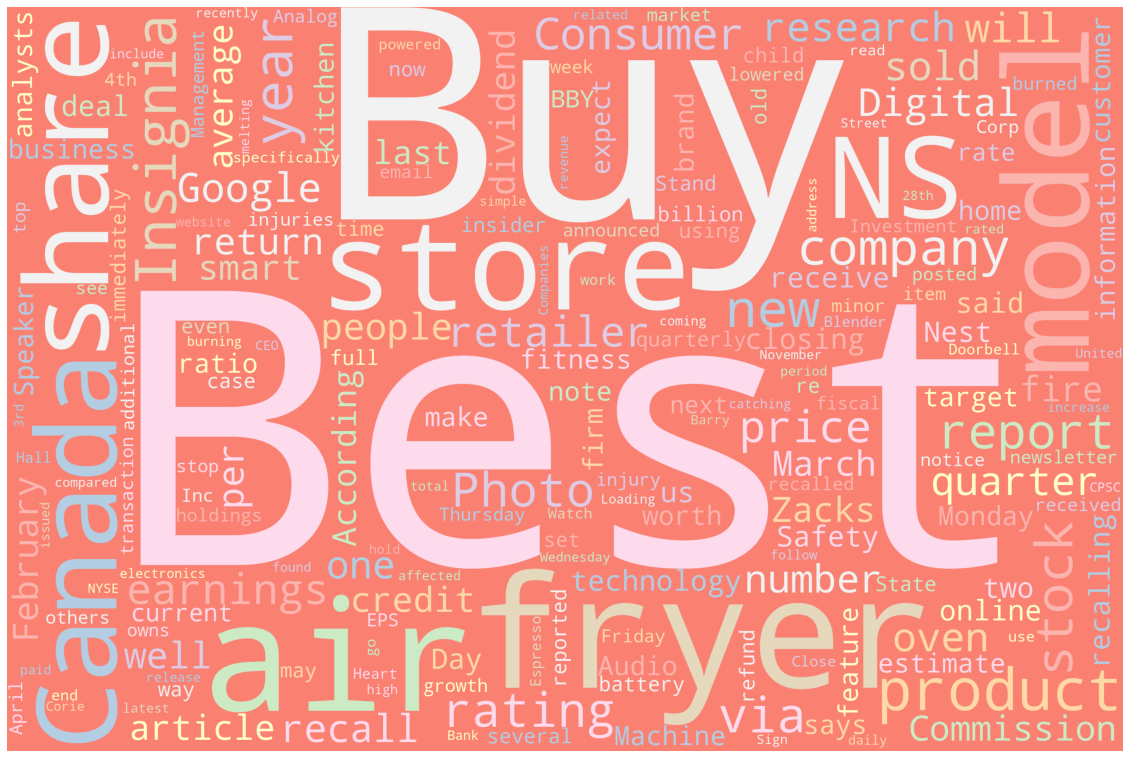

In [85]:
# Generate word cloud
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(text)
# Plot
plot_cloud(wordcloud)

In [86]:
for i in range(len(news_df)):
  news_df['Summary'][i] = re.sub(r'==.*?==+', '', news_df['Summary'][i])
  news_df['Summary'][i] = re.sub(r'==.*?==+', '', news_df['Summary'][i])

In [90]:
for i in range(len(news_df)):
  if len(news_df['Summary'][i]) > 10:
    print(news_df['Media'][i])
    print()
    print(news_df['Summary'][i])
    print('----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')


Defense World

Wall Street brokerages expect that Best Buy Co., Inc. (NYSE:BBY – Get Rating) will report earnings per share of $1.57 for the current fiscal quarter, according to Zacks.
Zacks’ earnings per share calculations are a mean average based on a survey of research analysts that follow Best Buy.
Get Best Buy alerts:Best Buy (NYSE:BBY – Get Rating) last released its quarterly earnings data on Thursday, March 3rd.
According to data from MarketBeat.com, Best Buy has a consensus rating of “Buy” and an average target price of $118.93.
About Best Buy (Get Rating)Best Buy Co, Inc retails technology products in the United States and Canada.
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Business Insider

Best Buy is recal

In [168]:
# pip install yfinance

In [92]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
import yfinance as yf

In [102]:
now = dt.today()
now = now.strftime('%Y-%m-%d')

In [104]:
data = yf.download('BBY', 
                      start='2015-01-01', 
                      end=now, 
                      progress=False,
)
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,39.169998,39.320000,38.169998,38.790001,31.048212,3889300
2015-01-05,38.549999,38.709999,37.730000,37.790001,30.247787,4853600
2015-01-06,37.650002,37.980000,36.639999,37.450001,29.975647,6776700
2015-01-07,37.980000,38.840000,37.980000,38.529999,30.840105,5432900
2015-01-08,38.990002,39.270000,38.700001,39.110001,31.304354,8457400


In [105]:
data['Date'] = data.index

In [108]:
data.tail(7)

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2022-04-13,92.949997,95.750000,92.269997,95.230003,95.230003,1874100,2022-04-13
2022-04-14,95.500000,96.769997,93.500000,93.839996,93.839996,2019100,2022-04-14
2022-04-18,93.690002,94.510002,91.959999,93.480003,93.480003,1628000,2022-04-18
2022-04-19,93.309998,96.129997,92.779999,95.570000,95.570000,1809200,2022-04-19
2022-04-20,96.029999,96.180000,93.970001,94.400002,94.400002,1340200,2022-04-20
2022-04-21,95.790001,96.750000,93.230003,93.639999,93.639999,1643100,2022-04-21
2022-04-22,93.150002,93.239998,90.559998,91.279999,91.279999,1955900,2022-04-22


In [109]:
import plotly.express as px
fig = px.box(data, x=data['Date'], y="Close", points="all")
fig.show()

In [110]:
# Select only the important features i.e. the date and price
data = data[["Date","Close"]] # select Date and Price
# Rename the features: These names are NEEDED for the model fitting
data = data.rename(columns = {"Date":"ds","Close":"y"}) #renaming the columns of the dataset
data.head(5)

,ds,y
Date,,
2015-01-02,2015-01-02,38.790001
2015-01-05,2015-01-05,37.790001
2015-01-06,2015-01-06,37.450001
2015-01-07,2015-01-07,38.529999
2015-01-08,2015-01-08,39.110001


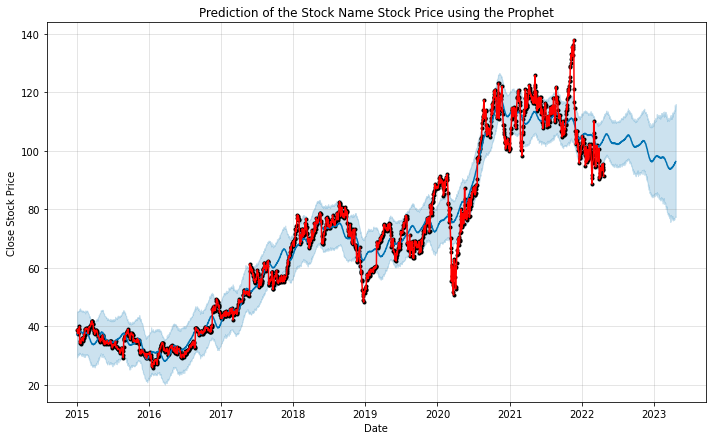

In [167]:
future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.plot(data['y'], color = 'red')
plt.title("Prediction of the "+"Stock Name "+"Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

In [229]:
plot_df = prediction[-370:-340].rename(columns = {'ds':'Date', 'yhat':'Forecast'})

In [230]:
px.line(plot_df,x = 'Date', y = 'Forecast', title='Weekly Forecast')

In [173]:
today = dt.today()
yesterday = today - timedelta(days = 1)
today = today.strftime('%Y-%m-%d')
yesterday = yesterday.strftime('%Y-%m-%d')

In [174]:
data = yf.download('BBY', 
                      start=yesterday, 
                      end=today, 
                      progress=False,
)
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-04-22,93.150002,93.239998,90.559998,91.279999,91.279999,1925119


In [180]:
key_df = pd.read_csv('/content/Capstone_Key_Label.csv').drop('Unnamed: 0', axis = 1)

In [176]:
import pickle

In [205]:
pickled_model = pickle.load(open('Capstone_RFR_model.pkl', 'rb'))

In [184]:
predict_df = news_df.drop(['Date','Media','Article','Summary','Key_words','words','Score','Title'], axis = 1)

In [191]:
predict_df['Open'] = data['Close'][0]
predict_df['Volume'] = data['Volume'][0]

In [200]:
predict_df.insert(loc=0, column='ticker', value=key_df[key_df['ticker'] == 'BBY']['keys'].iloc[0])

In [201]:
predict_df

,ticker,Positive Score,Negative Score,Neutral Score,Compound,PNN Score,Open,Volume
0,13,0.264,0.018,0.717,0.9996,1,91.279999,1925119
1,13,0.240,0.065,0.695,0.9908,1,91.279999,1925119
2,13,0.254,0.087,0.659,0.9924,1,91.279999,1925119
3,13,0.233,0.083,0.684,0.9828,1,91.279999,1925119
4,13,0.219,0.072,0.709,0.9870,1,91.279999,1925119
5,13,0.235,0.058,0.707,0.9702,1,91.279999,1925119
6,13,0.191,0.019,0.790,0.9980,1,91.279999,1925119
7,13,0.000,0.000,0.000,0.0000,0,91.279999,1925119
8,13,0.351,0.018,0.630,0.9998,1,91.279999,1925119
9,13,0.264,0.037,0.699,0.9984,1,91.279999,1925119


In [213]:
pickled_model.predict(predict_df).min()

90.91850471496582

In [214]:
pickled_model.predict(predict_df).mean()

91.77647695541381

In [215]:
pickled_model.predict(predict_df).max()

92.48205280303955

In [220]:
if pickled_model.predict(predict_df).mean()>predict_df['Open'].iloc[0]:
  print("Stock is going to improve today")
else:
  print("Stock price might fall today")

Stock is going to improve today
